1. sklearn中LogisticRegression$L_1$正则化   
$$ J(\beta) + \alpha L_1 \Longrightarrow CJ(\beta) + L_1$$    
2. sklearn中LogisticRegression$L_2$正则化    
$$ J(\beta) + \alpha L_2 \Longrightarrow CJ(\beta) + L_2 $$    

易知:$C$为$\alpha$的倒数,较小的值指定更强的正则化

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2+X[:, 1])<1.5, dtype=np.int32)
for _ in range(20):
    y[np.random.randint(200)] = 1 # 添加一定噪音

In [35]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


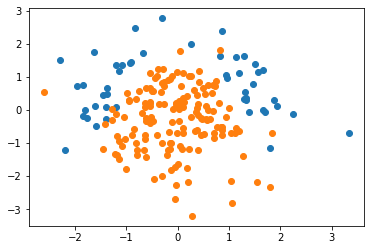

In [36]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

'''
solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale.
===>You can preprocess the data with a scaler from sklearn.preprocessing.
'''
log_reg = LogisticRegression(solver='lbfgs', n_jobs=-1) 
# default:c=1.0
# default:penalty='l2'
log_reg.fit(X_train, y_train) # 使用直线进行拟合

LogisticRegression(n_jobs=-1)

In [38]:
log_reg.score(X_train, y_train)

0.8133333333333334

In [39]:
log_reg.predict_proba(X_train) # 预测结果天生就可以输出为概率向量

array([[0.16109366, 0.83890634],
       [0.07580859, 0.92419141],
       [0.12211964, 0.87788036],
       [0.11231661, 0.88768339],
       [0.23216917, 0.76783083],
       [0.08388033, 0.91611967],
       [0.39706343, 0.60293657],
       [0.30312837, 0.69687163],
       [0.28434119, 0.71565881],
       [0.27479114, 0.72520886],
       [0.05327169, 0.94672831],
       [0.13368571, 0.86631429],
       [0.18998678, 0.81001322],
       [0.03075272, 0.96924728],
       [0.21205262, 0.78794738],
       [0.16117169, 0.83882831],
       [0.56635003, 0.43364997],
       [0.246471  , 0.753529  ],
       [0.27311471, 0.72688529],
       [0.16708064, 0.83291936],
       [0.08700787, 0.91299213],
       [0.06845578, 0.93154422],
       [0.02797821, 0.97202179],
       [0.11860537, 0.88139463],
       [0.16571224, 0.83428776],
       [0.33986327, 0.66013673],
       [0.2664735 , 0.7335265 ],
       [0.30133201, 0.69866799],
       [0.09942234, 0.90057766],
       [0.27107559, 0.72892441],
       [0.

In [40]:
log_reg.predict(X_train) # Predict class labels for samples in X.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
log_reg.score(X_test, y_test) # 欠拟合

0.82

In [42]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

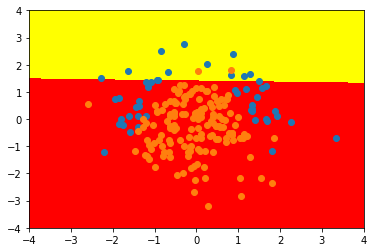

In [43]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [44]:
def PolynomialLogisticRegression(degree):
    # 管道机制实现了对全部步骤的流式化封装和管理
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(n_jobs=-1, solver='lbfgs'))
    ])

In [45]:
poly_log_reg = PolynomialLogisticRegression(degree=2) # 多项式最高项次数为2
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(n_jobs=-1))])

In [46]:
poly_log_reg.score(X_train, y_train)

0.9466666666666667

In [47]:
poly_log_reg.score(X_test, y_test) # 拟合程度较好

0.94

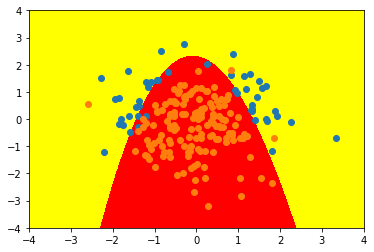

In [48]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [49]:
poly_log_reg[2].coef_ # 解释变量(项)的系数

array([[ 0.        , -0.1566485 , -1.71244585, -2.26888026, -0.07892356,
         0.02161449]])

In [50]:
poly_log_reg[2].intercept_ # 截距项

array([2.28287683])

In [51]:
poly_log_reg[0].get_feature_names() # 多项式的各项

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [52]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20) # 多项式最高项次数为20
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(n_jobs=-1))])

In [53]:
poly_log_reg2.score(X_train, y_train)

0.98

In [54]:
poly_log_reg2.score(X_test, y_test) # score没有得到提高

0.94

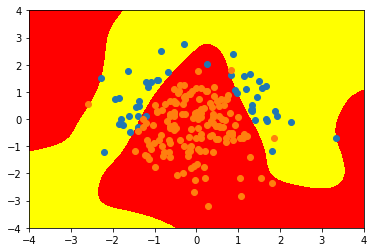

In [55]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 决策边界复杂,可能出现了过拟合

In [56]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, n_jobs=-1, solver='saga', max_iter=5000))
    ])

In [57]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l2')
poly_log_reg3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=5000, n_jobs=-1,
                                    solver='saga'))])

In [58]:
poly_log_reg3.score(X_train, y_train)

0.9266666666666666

In [59]:
poly_log_reg3.score(X_test, y_test)

0.9

In [60]:
poly_log_reg3[2].coef_ # L2正则不能将多项式系数收缩为0

array([[ 0.00000000e+00,  1.14153913e-02, -4.36740837e-01,
        -1.00708204e+00,  7.65553037e-02, -6.20659830e-02,
         4.81542142e-03, -4.60222363e-01,  1.99626813e-02,
        -1.89729141e-01, -5.71182492e-01,  1.11839428e-02,
        -2.09954682e-01,  6.19875658e-02, -4.16282571e-02,
        -1.40165376e-02, -1.28421728e-01, -3.28354229e-02,
        -1.96628064e-01,  2.68373400e-02, -6.24612031e-02,
        -2.58841267e-01, -1.84022118e-02, -1.36273910e-01,
         5.79942447e-03, -6.17357192e-02,  7.38679150e-03,
        -1.95448291e-02, -3.07372000e-02,  2.11392679e-02,
        -3.87974500e-02, -7.54479608e-02,  1.60956525e-03,
        -8.70077372e-02,  7.26464009e-03, -2.15139122e-02,
        -1.01046885e-01, -3.38976295e-02, -9.41664164e-02,
        -8.86470265e-03, -2.74143259e-02, -1.58217113e-02,
        -2.30303191e-02, -9.04576280e-03, -1.11324995e-02,
        -4.05332321e-02,  6.17925667e-02, -3.27411698e-02,
        -1.15743057e-02, -3.51806419e-03, -4.30643687e-0

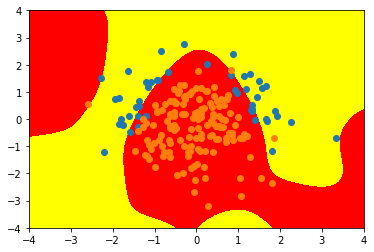

In [61]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [62]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=5000, n_jobs=-1,
                                    penalty='l1', solver='saga'))])

In [63]:
poly_log_reg4.score(X_train, y_train)

0.8866666666666667

In [64]:
poly_log_reg4.score(X_test, y_test)

0.78

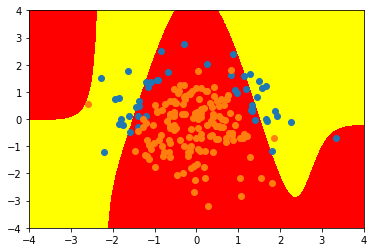

In [65]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [66]:
poly_log_reg4[2].coef_ # L1正则可以将某些多项式系数收缩为0,因此可以给出一个简单的可解释的模型

array([[ 0.00000000e+00,  0.00000000e+00, -5.05148332e-01,
        -1.16593735e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.65212257e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0